# Computational Social Science Project #3 

*Group number:* 1

*Group members:* Devon Sandel-Fernandez, David Su, Chase Stokes


*Semester:* Fall 2022

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

# Make sure to import other libraries that will be necessary for training models!

In [2]:
# Inspections Data 2011 - 2013
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

# Inspections Data 2014
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014.csv", 
                                      low_memory=False)

In [3]:
# Look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# List column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# Drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                'WARD',
                                                'PRECINCT',
                                                'LICENSE_CODE',
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag'],
                                     inplace = True)

chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# Convert the Inspection Date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'], infer_datetime_format=True)  

## Visualization

What do inspections look like over time?

*The inspections fluctuate over time between 400 and 900 inspections. In September 2012, 500 restuarants are inspected. There is a minimum of ~400 inspections in July 2012, and a maximum of 900 restaurants inspected in April 2013.*

<AxesSubplot:title={'center':'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

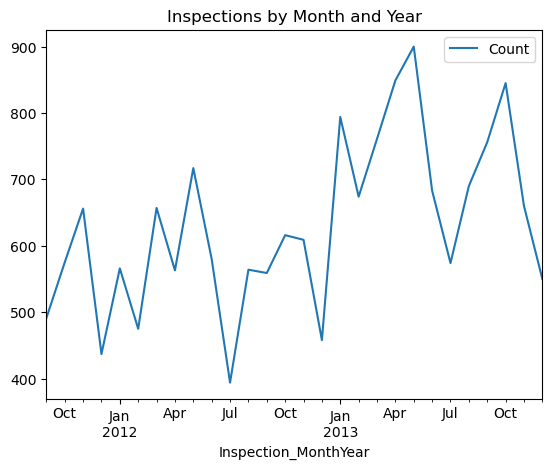

In [7]:
# Visualize Inspections Over Time
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

What do the results look like? 


*The number of restaurants passing inspections (approx 12000) is much higher than the number of restaurants failing (3500) or passing with conditions (2000).* 

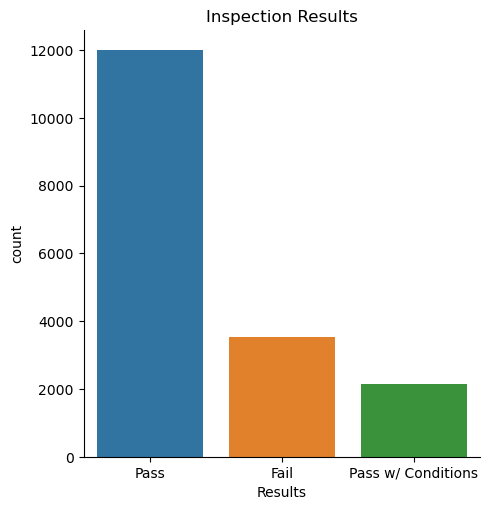

In [8]:
# Inspection Results
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate by facility type?

*There are more restaurants than other facility types. Roughly double the number of restaurants inspected pass and fail, compared to other facility types. This may be the result of overall greater number of restaurants, and shows a roughly equal likelihood of pass vs. fail regardless of restaurant vs. other facility type. A greater proportion of restaurants pass with conditions compared to other facility types.*

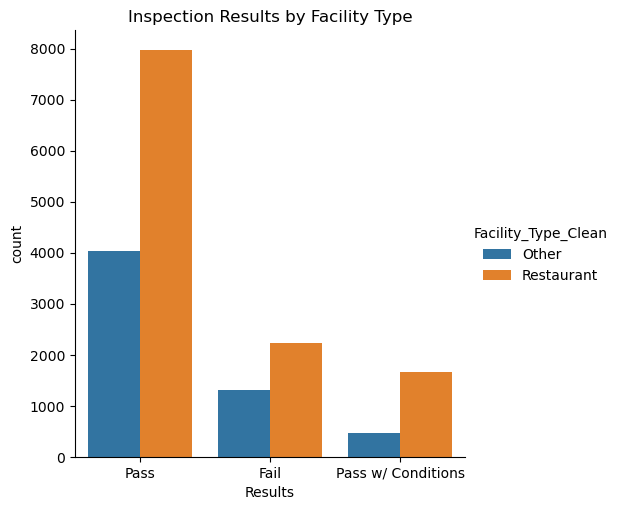

In [9]:
# Inspection Results by Facility Type (Restaurant or Not)
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count",
           hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show()

## Preprocess Data

In [10]:
# Drop datetime info
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                      'minDate',
                                      'maxDate',
                                      'Inspection_MonthYear'],
                                      axis = 1)

In [11]:
# Set target variable. 
y = chicago_inspections_2011_to_2013['Results']
## Comment out the following code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)
# Recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)

# All other features in X
X = chicago_inspections_2011_to_2013.drop(columns = ['Results'])
X = pd.get_dummies(X)

# drop WARD related variables
# we don't want to focus only on the location but rather the attributes about a restaurant which might make it more/less likely to pass/fail
# could also produce bias in the results based on Ward demographics
X = X[X.columns.drop(list(X.filter(regex='WARD')))]

In order to be sure that we have all the predictors that our test set has (as they have additional facility types), we load the data here in the same way we load it later. This is necessary to avoid errors in the number of inputs into models, as the test set will have a different number of imputs without this step and will not run. 

In [12]:
# Fill in the code below with the X data you used for training
X_test = chicago_inspections_2014[chicago_inspections_2014.columns & chicago_inspections_2011_to_2013.columns]
X_test = X_test.dropna()

X_test = pd.get_dummies(X_test)

# drop WARD related variables
X_test = X_test[X_test.columns.drop(list(X_test.filter(regex='WARD')))]

# add the missing facility type columns
missing_facilities = list(set(X_test.columns).difference(X.columns))
X[missing_facilities] = 0

C:\Users\chase\AppData\Local\Temp\ipykernel_2320\2133440249.py:2: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  X_test = chicago_inspections_2014[chicago_inspections_2014.columns & chicago_inspections_2011_to_2013.columns]


In [13]:
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Facility_Type_1005,Facility_Type_1023 CHILDERN'S SERVICE FACILITY,Facility_Type_1023 CHILDERN'S SERVICE S FACILITY,Facility_Type_1023 CHILDERN'S SERVICES FACILITY,Facility_Type_1023-CHILDREN'S SERVICES FACILITY,Facility_Type_A-Not-For-Profit Chef Training Program,Facility_Type_ASSISTED LIVING,Facility_Type_BAKERY,Facility_Type_BAKERY/DELI,Facility_Type_BANQUET,Facility_Type_BANQUET FACILITY,Facility_Type_BANQUET HALL,Facility_Type_BAR,Facility_Type_BAR/GRILL,Facility_Type_BEFORE AND AFTER SCHOOL PROGRAM,Facility_Type_BEVERAGE/SILVERWARE WAREHOUSE,Facility_Type_Bakery,Facility_Type_Banquet Dining,Facility_Type_Banquet rooms,Facility_Type_CAFE/STORE,Facility_Type_CAFETERIA,Facility_Type_CANDY STORE,Facility_Type_CANDY/GELATO,Facility_Type_CATERING COMPANY,Facility_Type_CATERING/CAFE,Facility_Type_CHARITY AID KITCHEN,Facility_Type_CHINESE HERBS,Facility_Type_CITY OF CHICAGO COLLEGE,Facility_Type_COFFEE SHOP,Facility_Type_COFFEE CART,Facility_Type_COFFEE KIOSK,Facility_Type_COFFEE SHOP,Facility_Type_COLD/FROZEN FOOD STORAGE,Facility_Type_COLLEGE,Facility_Type_COMMISSARY FOR SOFT SERVE ICE CREAM TRUCKS,Facility_Type_CONVENIENCE,Facility_Type_CONVENIENCE STORE,Facility_Type_CONVNIENCE STORE,Facility_Type_CULINARY ARTS SCHOOL,Facility_Type_CULINARY SCHOOL,Facility_Type_CUSTOM POULTRY SLAUGHTER,Facility_Type_Cafeteria,Facility_Type_Catering,Facility_Type_Children's Services Facility,Facility_Type_Coffee shop,Facility_Type_Commissary,Facility_Type_DAYCARE,Facility_Type_DAYCARE 1023,Facility_Type_DRUG STORE/GROCERY,Facility_Type_DRUG/FOOD STORE,Facility_Type_DRUG/GROCERY STORE,Facility_Type_Daycare (2 - 6 Years),Facility_Type_Daycare (2 Years),Facility_Type_Daycare (Under 2 Years),Facility_Type_Daycare Above and Under 2 Years,Facility_Type_Daycare Combo 1586,Facility_Type_Deli,Facility_Type_FAST FOOD/LIQUOR,Facility_Type_FITNESS CENTER,Facility_Type_GAS STATION,Facility_Type_GAS STATION /GROCERY,Facility_Type_GAS STATION/GROCERY,Facility_Type_GAS STATION/MINI MART,Facility_Type_GAS STATION/RESTAURANT,Facility_Type_GROCERY AND BUTCHER,Facility_Type_GROCERY STORE / GAS STATION,Facility_Type_GROCERY STORE/ RESTAURANT,Facility_Type_GROCERY STORE/BAKERY,Facility_Type_GROCERY STORE/COOKING SCHOOL,Facility_Type_GROCERY STORE/RESTAURANT,Facility_Type_GROCERY STORE/TAQUERIA,Facility_Type_GROCERY/BAKERY,Facility_Type_GROCERY/RESTAURANT,Facility_Type_GROCERY/SERVICE GAS STATION,Facility_Type_GROCERY/TAQUERIA,Facility_Type_GYM,Facility_Type_Golden Diner,Facility_Type_Grocery & Restaurant,Facility_Type_Grocery Store,Facility_Type_Grocery(Sushi prep),Facility_Type_HEALTH/ JUICE BAR,Facility_Type_HERBAL MEDICINE,Facility_Type_HERBAL STORE,Facility_Type_HOT DOG STATION,Facility_Type_Hospital,Facility_Type_ICE CREAM SHOP,Facility_Type_JUICE BAR,Facility_Type_LIVE POULTRY,Facility_Type_LONG TERM CARE,Facility_Type_Liquor,Facility_Type_Long Term Care,Facility_Type_Long Term Care Facility,Facility_Type_Long-Term Care,Facility_Type_Long-Term Care Facility,Facility_Type_MEXICAN CANDY MAKER/STORE,Facility_Type_Mobile Desserts Vendor,Facility_Type_Mobile Food Dispenser,Facility_Type_Mobile Food Preparer,Facility_Type_NURSING HOME,Facility_Type_Navy Pier Kiosk,Facility_Type_PASTRY school,Facility_Type_Paleteria,Facility_Type_Private School,Facility_Type_REHAB CENTER,Facility_Type_REPACKAGING PLANT,Facility_Type_RESEARCH KITCHEN,Facility_Type_REST/ROOFTOP,Facility_Type_RESTAURANT.BANQUET HALLS,Facility_Type_RESTAURANT/ GROCERY,Facility_Type_RESTAURANT/BAKERY,Fac

## Fit Models

Be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using train/validation splits or cross-validation)

In [14]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size = .2, 
                                                           stratify = y)

## Model 1: Logistic Regression (Devon)

In [15]:
# Set seed
np.random.seed(10)

from sklearn.linear_model import LogisticRegression

# create a model
logit_reg = LogisticRegression(max_iter = 10000)

# fit the model
logit_model = logit_reg.fit(X_train, y_train.ravel())

In [16]:
from sklearn.model_selection import GridSearchCV

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score

In [17]:
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': np.arange(.1, 1, .1),
               'fit_intercept': ['True', 'False'],
             'solver': ['liblinear', 'saga']}

logit_grid = GridSearchCV(logit_model, param_grid, cv=3)
logit_grid.fit(X_train, y_train)

best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)

print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_validate))

# {'C': 0.1, 'fit_intercept': 'True', 'penalty': 'l1', 'solver': 'saga'}
# Validation Accuracy 0.9222984002611818

{'C': 0.1, 'fit_intercept': 'True', 'penalty': 'l1', 'solver': 'saga'}
Validation Accuracy 0.9131570355860268


In [18]:
# fit best model on our data
logit_model_best = logit_grid.best_estimator_.fit(X_train, y_train.ravel())

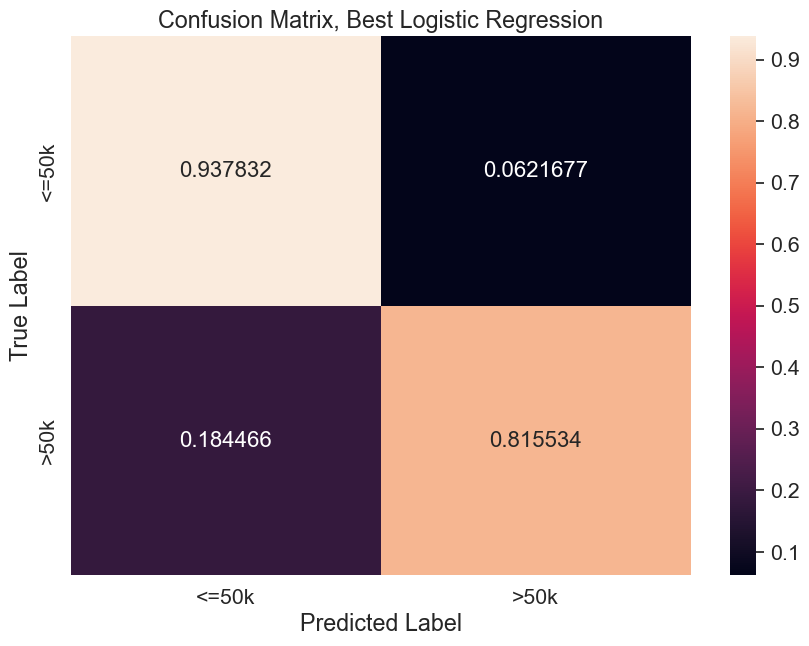

In [19]:
cf_matrix = confusion_matrix(y_validate, best_logit_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "<=50k", 1: ">50k"})
df_cm.index = ["<=50k", ">50k"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix, Best Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Model 2: SVM (Chase)

In [20]:
%%time
# create a model
svm = SVC()

# fit the model
svm_model = svm.fit(X_train, y_train.flatten())
y_pred1 = svm_model.predict(X_validate)

CPU times: total: 17.4 s
Wall time: 21.7 s


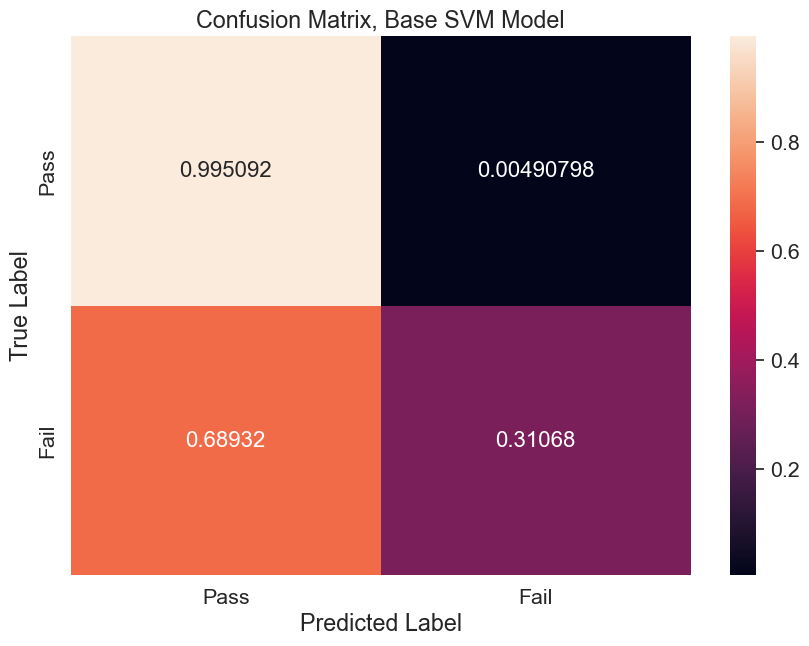

In [21]:
cf_matrix = confusion_matrix(y_validate, y_pred1, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "Pass", 1: "Fail"})
df_cm.index = ["Pass", "Fail"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix, Base SVM Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [22]:
# grid search
# this is taking far too long to search, so I hard-coded the output directly
# uncomment to run the grid search fully
# param_grid = {
#     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
#     'C': np.arange(.1, 1, .1)
# }

# svm_grid = GridSearchCV(svm_model, param_grid, cv=3)
# svm_grid.fit(X_train, y_train.flatten())

# best_index = np.argmax(svm_grid.cv_results_["mean_test_score"])
# best_svm_pred = svm_grid.best_estimator_.predict(X_validate)

# print(svm_grid.cv_results_["params"][best_index])
# print('Validation Accuracy', accuracy_score(best_svm_pred, y_validate))

# the following parameters were hard-coded based on the output from the GridSearchCV
best_C = 0.2
best_kernel = "linear"

In [23]:
%%time
# fit best model
svm_best = SVC(C = best_C, kernel = best_kernel)

CPU times: total: 0 ns
Wall time: 0 ns


In [24]:
%%time
svm_model_best = svm_best.fit(X_train, y_train.flatten())

CPU times: total: 9min 16s
Wall time: 12min 2s


In [25]:
%%time
best_svm_pred = svm_model_best.predict(X_validate)

CPU times: total: 734 ms
Wall time: 1.3 s


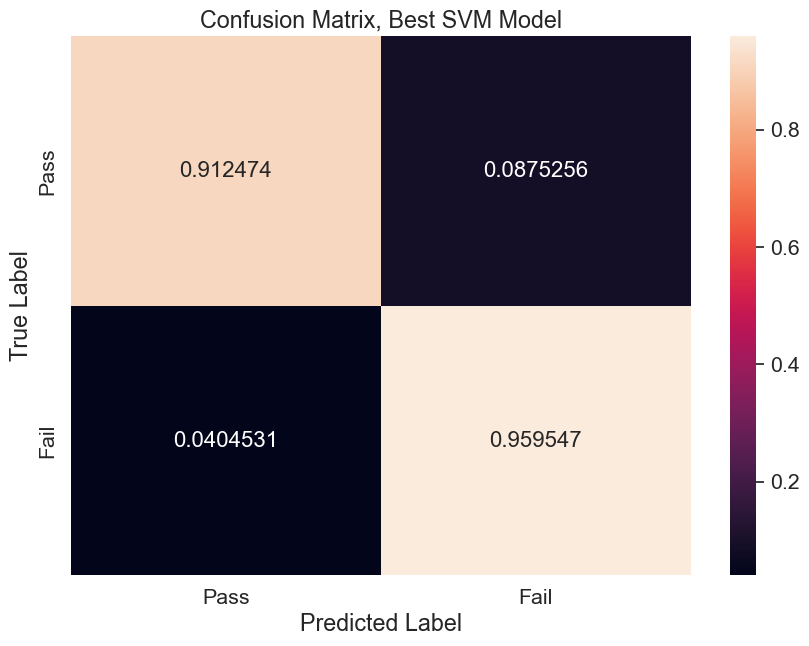

In [26]:
cf_matrix_best = confusion_matrix(y_validate, best_svm_pred, normalize = "true")

df_cm_best = pd.DataFrame(cf_matrix_best, range(2),
                  range(2))

df_cm_best = df_cm_best.rename(index=str, columns={0: "Pass", 1: "Fail"})
df_cm_best.index = ["Pass", "Fail"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm_best, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix, Best SVM Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Model 3: Random Forest (David Su )

In [27]:
%matplotlib inline
#sns.set_style("darkgrid")

# Initialize a random forest
rf_classifier = RandomForestClassifier(criterion='gini',  # or 'entropy' for information gain
                       max_depth=None,  # how deep tree nodes can go
                       min_samples_split=2,  # samples needed to split node
                       min_samples_leaf=1,  # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features= "sqrt",  # number of features to look for when splitting
                       max_leaf_nodes= None,  # max nodes
                       min_impurity_decrease=1e-07, #early stopping
                       random_state = 10) #random seed


In [28]:
%%time
# Perform grid search for RF hyperparameter tuning, will try 900 models & will take upto 10 minutes
param_grid = {'criterion':['gini', 'entropy',],
              'max_depth': np.arange(1, 100, 15),
              'min_samples_split': np.arange(1, 5, 1),
              'max_features': ['sqrt'],
              'min_samples_leaf': np.arange(1, 5, 1)}
rf_grid_reg = GridSearchCV(rf_classifier, param_grid, cv=3)
rf_grid_reg.fit(X_train, y_train)


CPU times: total: 10min 10s
Wall time: 13min 40s


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_features='sqrt',
                                              min_impurity_decrease=1e-07,
                                              random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1, 16, 31, 46, 61, 76, 91]),
                         'max_features': ['sqrt'],
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([1, 2, 3, 4])})

In [29]:
# record the model's parameter
best_index = np.argmax(rf_grid_reg.cv_results_["mean_test_score"])
# what parameter does this model have?
rf_grid_reg.best_estimator_.get_params()

# use the best estimator to predict the validation set
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))
best_rf_pred = rf_grid_reg.best_estimator_.predict(X_validate)
print(rf_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(rf_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', rf_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_rf_pred, y_validate))



{'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 1}
Best CV R^2: nan
Validation R^2: 0.920992491021874
Validation RMSE 0.5763988110260977


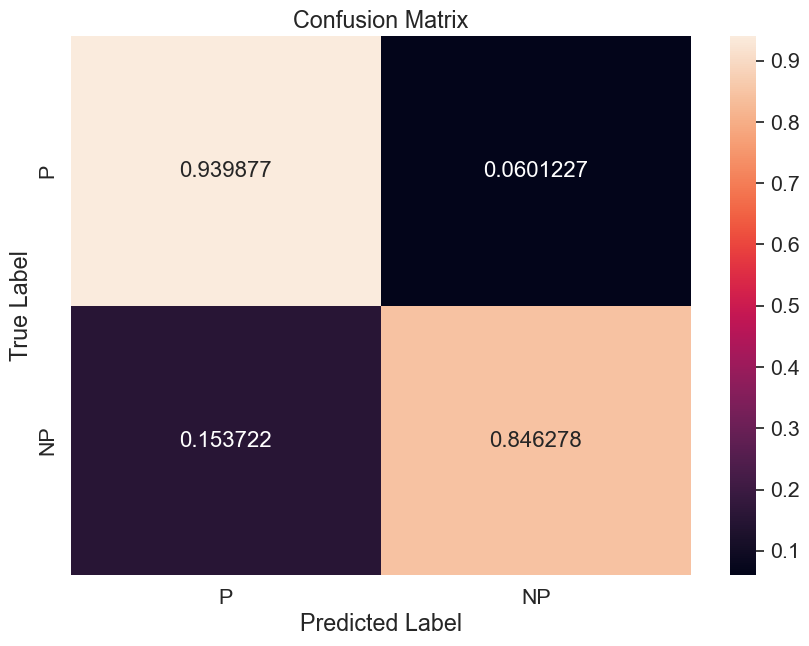

In [30]:
#David's evaluation of the best RF

# confusion matrix for the prediction
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_validate, best_rf_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "P", 1: "NP"})
df_cm.index = ["P", "NP"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



In [31]:
## a function that calculate evaluation performance
def eva_calculator(y_validate, y_pred):
    
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_validate[i]==y_pred[i]==1:
            TP += 1
        if y_pred[i]==1 and y_validate[i]!=y_pred[i]:
            FP += 1
        if y_validate[i]==y_pred[i]==0:
            TN += 1
        if y_pred[i]==0 and y_pred[i]!=y_validate[i]:
            FN += 1
            
    accuracy = (TP + TN)/(TP + TN + FP + FN)
    print("Accuracy is", accuracy)
    precision = TP/(TP + FP)
    print("Precision is", precision)
    recall = TP/(TP + FN)
    print("Recall is", recall)
    F1 = 2 * (precision * recall)/(precision + recall)
    print("F1 Score is", F1)
    return recall

# use function to calculate rf performance
recall = eva_calculator(y_validate, best_rf_pred)
print(f"Recall means that of all the NP cases, {recall} are successfully flagged by the algorithm.")
print("Why do I use Recall? Because it provides policy guidance on which restaurants maybe violating rules!")


Accuracy is 0.920992491021874
Precision is 0.7805970149253731
Recall is 0.8462783171521036
F1 Score is 0.8121118012422359
Recall means that of all the NP cases, 0.8462783171521036 are successfully flagged by the algorithm.
Why do I use Recall? Because it provides policy guidance on which restaurants maybe violating rules!


## Validation Metrics

This analysis centers around a public health issue, as this dataset is about the evalation of food safety and standards. Therefore, we want to be sure that we are not incorrectly identifying any true cases of inspection failures as inspection passes. This would result in a recommendation of 'Pass' for facilities which should have failed. 

In this dataset, a 1 indicates a failure and a 0 represents a pass. So, in this case, we want to focus on evaluating the instances in which our model suggested 0 for an inspection which should have been a 1. 

This is known as a False Negative, which makes `Recall` the best metric to use to evaluate our models.

In [32]:
# Logistic regression metrics

TP_logit = 0
FP_logit = 0
TN_logit = 0
FN_logit = 0

for i in range(len(best_logit_pred)): 
    if y_validate[i]==best_logit_pred[i]==1:
       TP_logit += 1
    if best_logit_pred[i]==1 and y_validate[i]!=best_logit_pred[i]:
       FP_logit += 1
    if y_validate[i]==best_logit_pred[i]==0:
       TN_logit += 1
    if best_logit_pred[i]==0 and best_logit_pred[i]!=y_validate[i]:
       FN_logit += 1

In [33]:
logit_accuracy = (TP_logit + TN_logit)/(TP_logit + TN_logit + FP_logit + FN_logit)
print("Logistic regression accuracy is", logit_accuracy)
logit_precision = TP_logit/(TP_logit + FP_logit)
print("Logistic regression precision is", logit_precision)
logit_recall = TP_logit/(TP_logit + FN_logit)
print("Logistic regression recall is", logit_recall)
logit_f1 = 2 * (logit_precision * logit_recall)/(logit_precision + logit_recall)
print("Logistic regression F1 Score is", logit_f1)

Logistic regression accuracy is 0.9131570355860268
Logistic regression precision is 0.7682926829268293
Logistic regression recall is 0.8155339805825242
Logistic regression F1 Score is 0.7912087912087913


In [34]:
# SVM metrics

TP_svm = 0
FP_svm = 0
TN_svm = 0
FN_svm = 0

for i in range(len(best_svm_pred)): 
    if y_validate[i]==best_svm_pred[i]==1:
        TP_svm += 1
    if best_svm_pred[i]==1 and y_validate[i]==0:
        FP_svm += 1
    if y_validate[i]==best_svm_pred[i]==0:
        TN_svm += 1
    if best_svm_pred[i]==0 and best_svm_pred[i]!=y_validate[i]:
        FN_svm += 1
        
svm_accuracy = (TP_svm + TN_svm)/(TP_svm + TN_svm + FP_svm + FN_svm)
print("SVM Accuracy is", svm_accuracy)
svm_precision = TP_svm/(TP_svm + FP_svm)
print("SVM Precision is", svm_precision)
svm_recall = TP_svm/(TP_svm + FN_svm)
print("SVM Recall is", svm_recall)
svm_f1 = 2 * (svm_precision * svm_recall)/(svm_precision + svm_recall)
print("SVM F1 Score is", svm_f1)

SVM Accuracy is 0.9219719229513549
SVM Precision is 0.734820322180917
SVM Recall is 0.959546925566343
SVM F1 Score is 0.832280701754386


In [35]:
## a function that calculate evaluation performance
def eva_calculator(y_validate, y_pred):
    
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_validate[i]==y_pred[i]==1:
            TP += 1
        if y_pred[i]==1 and y_validate[i]!=y_pred[i]:
            FP += 1
        if y_validate[i]==y_pred[i]==0:
            TN += 1
        if y_pred[i]==0 and y_pred[i]!=y_validate[i]:
            FN += 1
            
    accuracy = (TP + TN)/(TP + TN + FP + FN)
    print("Accuracy is", accuracy)
    precision = TP/(TP + FP)
    print("Precision is", precision)
    recall = TP/(TP + FN)
    print("Recall is", recall)
    F1 = 2 * (precision * recall)/(precision + recall)
    print("F1 Score is", F1)
    return recall
# use function to calculate rf performance
# rf metrics
recall = eva_calculator(y_validate, best_rf_pred)
print(f"Recall means that of all the NP cases, {recall} are successfully flagged by the random forest algorithm.")
print("Why do I use Recall? Because it provides policy guidance on which restaurants maybe violating rules!")

Accuracy is 0.920992491021874
Precision is 0.7805970149253731
Recall is 0.8462783171521036
F1 Score is 0.8121118012422359
Recall means that of all the NP cases, 0.8462783171521036 are successfully flagged by the random forest algorithm.
Why do I use Recall? Because it provides policy guidance on which restaurants maybe violating rules!


## Policy Simulation

### Interpretable Machine Learning

**Hint**: Use tools like feature importance plots and coefficient plots

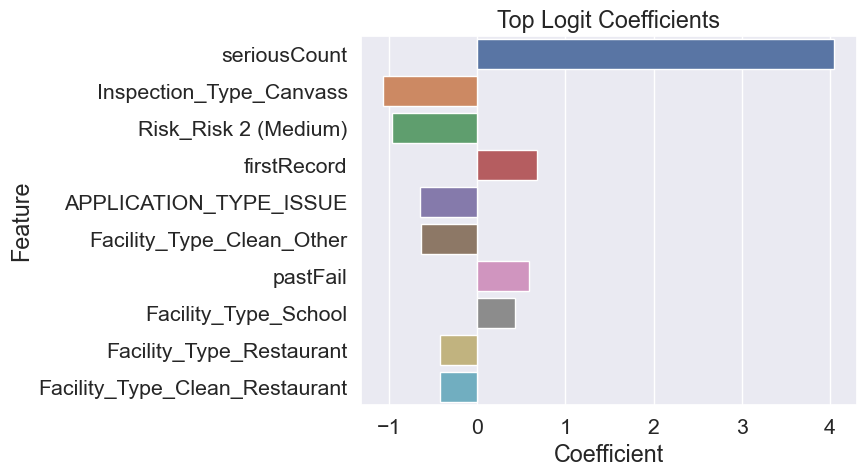

In [36]:
# Logistic regression

logit_data = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logit_model_best.coef_))], axis = 1)
logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])

sns.barplot(x="Coefficient", y="Feature", data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()

The logistic regression uses seriousCount as the most influential coefficient, followed by aspects about the inspection itself and the facility components, such as the type of facility or whether they failed an inspection in the past.

The logistic regression showed high accuracy, precision, recall, and F1. 

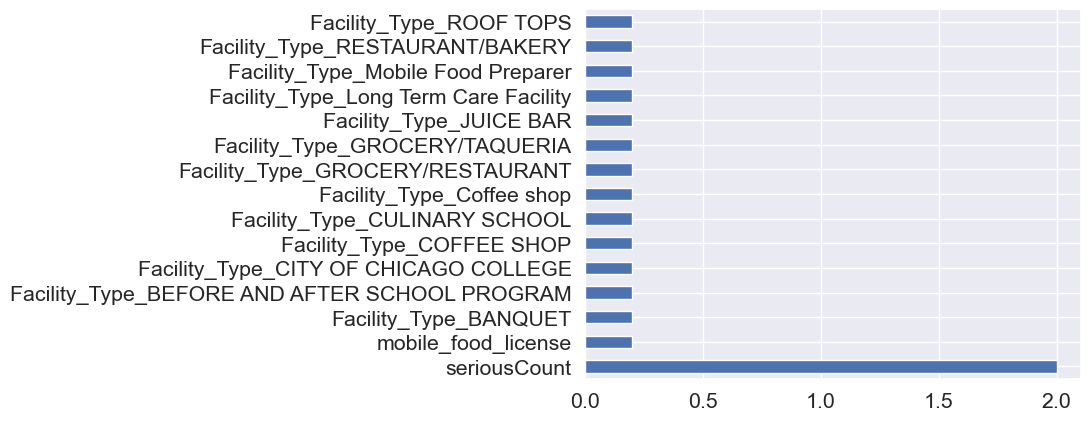

In [37]:
pd.Series(abs(svm_model_best.coef_[0]), index=X_validate.columns).nlargest(15).plot(kind='barh');

The SVM model uses a variable called `seriousCount` as its most influential coefficient. This seems importantly related to food safety and makes sense to place high weight on in the model. The other variables are all type-specific - whether or not a facility is of a given type. This is not a great metric for a model to rely so heavily on. It will end up predicting many violations in those facility types, but missing *many more* outside of those areas. While this may be indicative of more systemic issues with certain facility types, such as coffee shops or assisted living, it is certain that it will lead to over-auditing certain facility types and under-auditing others.

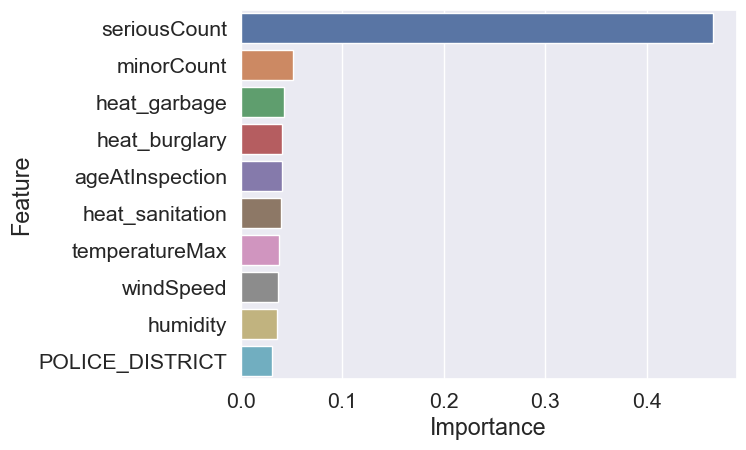

In [38]:
# Random Forest
rf_grid_reg.best_estimator_.fit(X_train, y_train.ravel())

#draw important predictors to interpret the model
import seaborn as sns

feat_importances = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(rf_grid_reg.best_estimator_.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]
sns.barplot(x = "Importance", y = "Feature", data = feat_importances.nlargest(10, 'Importance'))
plt.show()


In [39]:
print("From the Random Forest, serious count was the most important predictor for violation, followed by minor count, heat garbage, heat_burglary, heat_sanitation.")
david_rf = rf_grid_reg.best_estimator_
print("The best preforming RF model is shown below with these parameters:")
david_rf

From the Random Forest, serious count was the most important predictor for violation, followed by minor count, heat garbage, heat_burglary, heat_sanitation.
The best preforming RF model is shown below with these parameters:


RandomForestClassifier(criterion='entropy', max_depth=46, max_features='sqrt',
                       min_impurity_decrease=1e-07, min_samples_split=3,
                       random_state=10)

## Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1000 observations at random

Due to the lengthy run-time for SVM and the suspicion about the generalizability of the important coefficients (leading to suspicion about overfitting), we selected the Random Forest as our testing model due to its overall Recall score and explainability.

All 1000 entities with the highest violation probability was predicted by random forest correctly.


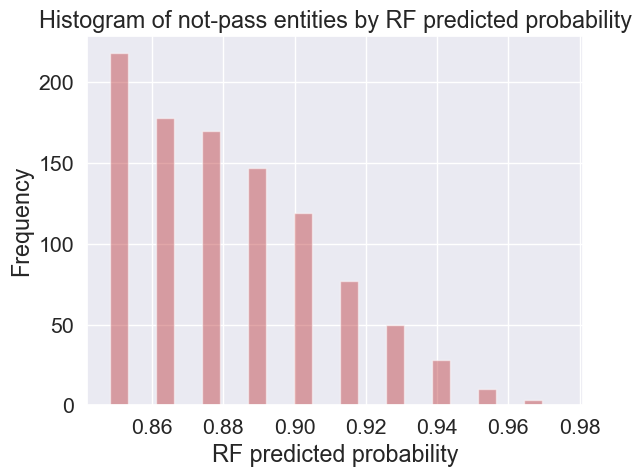

In [40]:
#David's Random Forest
# use the best RF classifier to run perdictions of violation for all the cases in our data
prob_violate = david_rf.predict_proba(X).T[1]

X_withlabel = X.reset_index(level=['Inspection_ID', 'DBA_Name'])

X_withlabel.iloc[:,0:2]
X_withlabel["prob_violence"] = prob_violate

y_new = np.zeros(len(y))

for i in range(len(y)):
    y_new[i] = y[i]

risk= pd.DataFrame(data ={"Inspection_ID": X_withlabel.iloc[:, 0],'DBA_Name': X_withlabel.iloc[:, 1], "prob_violate":prob_violate,"y":y_new})
risk['rank_prob'] = risk['prob_violate'].rank(ascending=False)
risk = risk.sort_values(by=['rank_prob'])

# get the first 1000 cases with the highest predicted probability of violation
top1000 = risk[0:1000]
import seaborn as sns
import matplotlib.pyplot as plt

# distribution of these 1000 cases by predicted probability of violation

top_yes = top1000[top1000['y'] == 1]["prob_violate"]
top_no = top1000[top1000['y'] == 0]["prob_violate"]

plot2 = plt.hist([top_yes, top_no], color=['r','b'], alpha=0.5)

# Add labels
plt.title('Histogram of not-pass entities by RF predicted probability')
plt.xlabel('RF predicted probability')
plt.ylabel('Frequency')

print("All 1000 entities with the highest violation probability was predicted by random forest correctly.")


For 1000 random audit, 793 passed while 207 did not pass
Among the incorrectly predicted random audit, 8 didnot pass and 11 passed.
Therefore, RF predictive auditing is more efficient compared to a random audition.


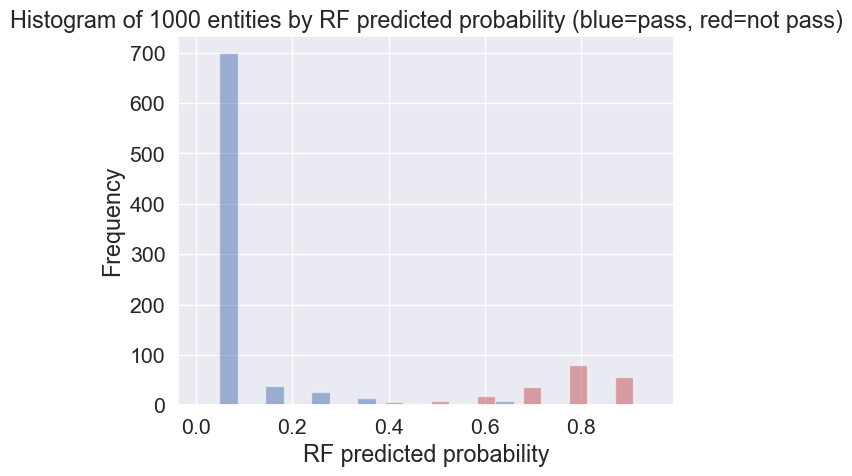

In [41]:
#Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1000 observations at random
random1000 = risk.sample(n=1000, random_state=1)
ran_yes = random1000[random1000['y'] == 1]["prob_violate"]
ran_no = random1000[random1000['y'] == 0]["prob_violate"]

plot2 = plt.hist([ran_yes, ran_no], color=['r','b'], alpha=0.5)

# Add labels
plt.title('Histogram of 1000 entities by RF predicted probability (blue=pass, red=not pass)')
plt.xlabel('RF predicted probability')
plt.ylabel('Frequency')

fn, fp = 0,0
for i in range(len(ran_yes)):
    if list(ran_yes)[i]<0.5:
        fn += 1
    
for i in range(len(ran_no)):
    if list(ran_no)[i]>=0.5:
        fp +=1 

print(f'For 1000 random audit, {len(ran_no)} passed while {len(ran_yes)} did not pass')
print(f'Among the incorrectly predicted random audit, {fn} didnot pass and {fp} passed.')
print("Therefore, RF predictive auditing is more efficient compared to a random audition.")

### Predict on Data with Unseen Labels

In [42]:
# Fill in the code below with the X data you used for training
X_test = chicago_inspections_2014[chicago_inspections_2014.columns & chicago_inspections_2011_to_2013.columns]
X_test = X_test.dropna()

X_test = pd.get_dummies(X_test)

# drop WARD related variables
X_test = X_test[X_test.columns.drop(list(X_test.filter(regex='WARD')))]

# add the missing columns from X_train and fill with zeros
missing_columns = list(set(X.columns).difference(X_test.columns))
X_test[missing_columns] = 0

In [43]:
best_rf_pred_test = rf_grid_reg.best_estimator_.predict(X_test)
pd.DataFrame(best_rf_pred_test).to_csv('predictions.csv')

# Discussion Questions

## Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?

Accuracy is a useful metric to gauge how often an ML model was correct overall, based on the ratio of true predictions to all predictions. However, sometimes the goals of a model are more than just "correctness". In particular, social sciences and public policy fields often are interested in specific categories of "correctness," such as an interest in false positives or false negatives. In this case, it is more important to accurately classify health *violations* than to worry about a few extra inspections on restaurants which eventually pass. There is a larger health risk by missing establishments which are unsafe rather than conducting an additional inspection of a safe restaurant. However, if we were approaching this from a financial position, we may be more concerned about the financial ramifications of unnecessary inspections. Precision, for example, captures how well the model avoids false positive predictions, which is important if the cost of mislabeling a false outcome is high.

These metrics beyond accuracy allow researchers to explicitly categorize the outcomes they care about, which are often specific and crucial to the research question in areas in social sciences and public policy.

## Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decision making and real world behavior?

There are a few options to address this interplay, each with their own set of trade-offs.

1. Use black box models (e.g., neural networks). 

Using a model which cannot report the most prevalent predictors would ensure that there is no ability to track algorithmic decision making onto real world behavior. At the same time, the model lacks interpretability and thus may face public backlash. The stakeholders may lose trust in the model if it does not perform accurately, as there is no way to verify the predictive components.

2. Make the algorithm propriety or a "trade secret".

While this would ensure difficulty in accessing which components about an establishment were key to prediction, this also creates an obscurity of the algorithm. This increases public suspicion about bias in algorithmic decision making (e.g., the inspection of Wards in primarily minority neighborhoods). It also makes this kind of bias more difficult to evaluate and negate. 

3. Continue re-training the models on the new behaviors.

If the establishments are changing their behavior, we will still be collecting data on those who pass or fail inspection based on these new behaviors. We can use this data to re-train the model every round of inspections to create a continually updating set of important features. This helps the algorithm stay ahead of real-world behavioral changes. However, it is computationally costly and of the options listed, the least likely to limit behavioral changes. 